In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
from netCDF4 import date2num,num2date
#from scipy.ndimage import gaussian_filter

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
ds_26 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_085_*_3z.nc', combine = 'by_coords', concat_dim = 'time')
ds_26.to_netcdf('test_26.nc')
ds26 = xr.open_dataset('test_26.nc')


C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
#test domain
#latbounds = [26.5, 27]
#lonbounds = [-91, -90.5]

#real domain 
latbounds = [24.5, 29]
lonbounds = [-93, -87.5]

lats = ds26.Latitude.values[:]
lons = ds26.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

lat_array=ds26.Latitude.values[latli:latui]
lon_array=ds26.Longitude.values[lonli:lonui]

In [4]:
#March 26 Dopplerscat
#ds26_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0001-0110_line01.L2.nc')
ds26_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0118-0170_line02.L2.nc')
ds26_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0180-0227_line03.L2.nc')
ds26_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0238-0296_line04.L2.nc')
ds26_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0306-0348_line05.L2.nc')
ds26_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0360-0375_line06.L2.nc')
ds26_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0377-0419_line07.L2.nc')
ds26_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0429-0470_line08.L2.nc')
ds26_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0485-0533_line09.L2.nc')
ds26_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0543-0581_line10.L2.nc')
#ds26_11=xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0588-0682_line11.L2.nc')

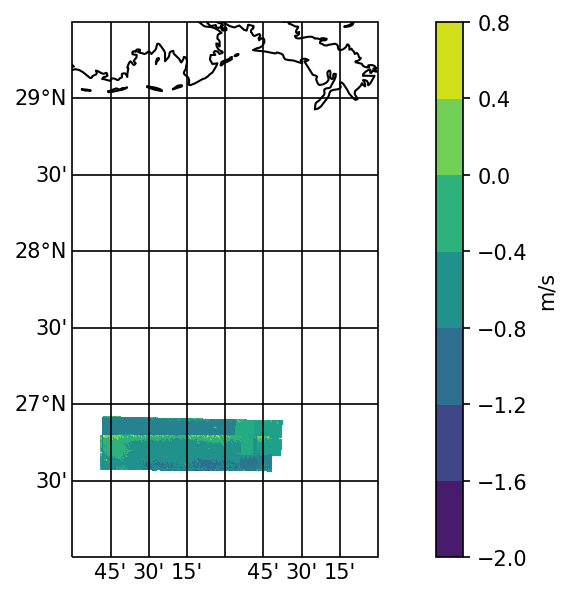

In [17]:

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.set_extent([-90.9, -89.65, 26.45, 27.15], crs=mapcrs)
ax.coastlines()
cs = ax.contourf(ds26_2.longitude.values, ds26_2.latitude.values, ds26_2.u_current.values)
cs = ax.contourf(ds26_3.longitude.values, ds26_3.latitude.values, ds26_3.u_current.values)
cs = ax.contourf(ds26_4.longitude.values, ds26_4.latitude.values, ds26_4.u_current.values)
cs = ax.contourf(ds26_5.longitude.values, ds26_5.latitude.values, ds26_5.u_current.values)
cs = ax.contourf(ds26_6.longitude.values, ds26_6.latitude.values, ds26_6.u_current.values)
cs = ax.contourf(ds26_7.longitude.values, ds26_7.latitude.values, ds26_7.u_current.values)
cs = ax.contourf(ds26_8.longitude.values, ds26_8.latitude.values, ds26_8.u_current.values)
cs = ax.contourf(ds26_9.longitude.values, ds26_9.latitude.values, ds26_9.u_current.values)
cs = ax.contourf(ds26_10.longitude.values, ds26_10.latitude.values, ds26_10.u_current.values)
#cs = ax.contourf(ds26_11.longitude.values, ds26_11.latitude.values, ds26_11.u_current.values)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.show()

In [5]:
#lat26_1=ds26_1.latitude.values
#lon26_1=ds26_1.longitude.values
#flag26_1=ds26_1.flag.values

lat26_2=ds26_2.latitude.values
lon26_2=ds26_2.longitude.values
flag26_2=ds26_2.flag.values

lat26_3=ds26_3.latitude.values
lon26_3=ds26_3.longitude.values
flag26_3=ds26_3.flag.values

lat26_4=ds26_4.latitude.values
lon26_4=ds26_4.longitude.values
flag26_4=ds26_4.flag.values

lat26_5=ds26_5.latitude.values
lon26_5=ds26_5.longitude.values
flag26_5=ds26_5.flag.values

lat26_6=ds26_6.latitude.values
lon26_6=ds26_6.longitude.values
flag26_6=ds26_6.flag.values

lat26_7=ds26_7.latitude.values
lon26_7=ds26_7.longitude.values
flag26_7=ds26_7.flag.values

lat26_8=ds26_8.latitude.values
lon26_8=ds26_8.longitude.values
flag26_8=ds26_8.flag.values

lat26_9=ds26_9.latitude.values
lon26_9=ds26_9.longitude.values
flag26_9=ds26_9.flag.values

lat26_10=ds26_10.latitude.values
lon26_10=ds26_10.longitude.values
flag26_10=ds26_10.flag.values

#lat26_11=ds26_11.latitude.values
#lon26_11=ds26_11.longitude.values
#flag26_11=ds26_11.flag.values

#speed26_1 = ds26_1.wind_speed.values
#dir26_1 = ds26_1.wind_dir.values
speed26_2 = ds26_2.wind_speed.values
dir26_2 = ds26_2.wind_dir.values
speed26_3 = ds26_3.wind_speed.values
dir26_3 = ds26_3.wind_dir.values
speed26_4 = ds26_4.wind_speed.values
dir26_4 = ds26_4.wind_dir.values
speed26_5 = ds26_5.wind_speed.values
dir26_5 = ds26_5.wind_dir.values
speed26_6 = ds26_6.wind_speed.values
dir26_6 = ds26_6.wind_dir.values
speed26_7 = ds26_7.wind_speed.values
dir26_7 = ds26_7.wind_dir.values
speed26_8 = ds26_8.wind_speed.values
dir26_8 = ds26_8.wind_dir.values
speed26_9 = ds26_9.wind_speed.values
dir26_9 = ds26_9.wind_dir.values
speed26_10 = ds26_10.wind_speed.values
dir26_10 = ds26_10.wind_dir.values
#speed26_11 = ds26_11.wind_speed.values
#dir26_11 = ds26_11.wind_dir.values

#dir_math26_1=90-dir26_1*(np.pi/180)
dir_math26_2=90-dir26_2*(np.pi/180)
dir_math26_3=90-dir26_3*(np.pi/180)
dir_math26_4=90-dir26_4*(np.pi/180)
dir_math26_5=90-dir26_5*(np.pi/180)
dir_math26_6=90-dir26_6*(np.pi/180)
dir_math26_7=90-dir26_7*(np.pi/180)
dir_math26_8=90-dir26_8*(np.pi/180)
dir_math26_9=90-dir26_9*(np.pi/180)
dir_math26_10=90-dir26_10*(np.pi/180)
#dir_math26_11=90-dir26_11*(np.pi/180)

#uWind26_1=speed26_1*np.cos(dir_math26_1*(180/np.pi))
#vWind26_1=speed26_1*np.sin(dir_math26_1*(180/np.pi))
uWind26_2=speed26_2*np.cos(dir_math26_2*(180/np.pi))
vWind26_2=speed26_2*np.sin(dir_math26_2*(180/np.pi))
uWind26_3=speed26_3*np.cos(dir_math26_3*(180/np.pi))
vWind26_3=speed26_3*np.sin(dir_math26_3*(180/np.pi))
uWind26_4=speed26_4*np.cos(dir_math26_4*(180/np.pi))
vWind26_4=speed26_4*np.sin(dir_math26_4*(180/np.pi))
uWind26_5=speed26_5*np.cos(dir_math26_5*(180/np.pi))
vWind26_5=speed26_5*np.sin(dir_math26_5*(180/np.pi))
uWind26_6=speed26_6*np.cos(dir_math26_6*(180/np.pi))
vWind26_6=speed26_6*np.sin(dir_math26_6*(180/np.pi))
uWind26_7=speed26_7*np.cos(dir_math26_7*(180/np.pi))
vWind26_7=speed26_7*np.sin(dir_math26_7*(180/np.pi))
uWind26_8=speed26_8*np.cos(dir_math26_8*(180/np.pi))
vWind26_8=speed26_8*np.sin(dir_math26_8*(180/np.pi))
uWind26_9=speed26_9*np.cos(dir_math26_9*(180/np.pi))
vWind26_9=speed26_9*np.sin(dir_math26_9*(180/np.pi))
uWind26_10=speed26_10*np.cos(dir_math26_10*(180/np.pi))
vWind26_10=speed26_10*np.sin(dir_math26_10*(180/np.pi))
#uWind26_11=speed26_11*np.cos(dir_math26_11*(180/np.pi))
#vWind26_11=speed26_11*np.sin(dir_math26_11*(180/np.pi))

In [6]:
#lonlen26_1=len(lon26_1) #236
#latlen26_1=len(lat26_1) #954

lonlen26_2=len(lon26_2)
latlen26_2=len(lat26_2)

lonlen26_3=len(lon26_3)
latlen26_3=len(lat26_3)

lonlen26_4=len(lon26_4)
latlen26_4=len(lat26_4)

lonlen26_5=len(lon26_5)
latlen26_5=len(lat26_5)

lonlen26_6=len(lon26_6)
latlen26_6=len(lat26_6)

lonlen26_7=len(lon26_7)
latlen26_7=len(lat26_7)

lonlen26_8=len(lon26_8)
latlen26_8=len(lat26_8)

lonlen26_9=len(lon26_9)
latlen26_9=len(lat26_9)

lonlen26_10=len(lon26_10)
latlen26_10=len(lat26_10)

#lonlen26_11=len(lon26_11)
#latlen26_11=len(lat26_11)

#goodWindUarr26_1=np.zeros((latlen26_1,lonlen26_1))
#goodWindUarr26_1[:]=np.nan
#goodWindVarr26_1=np.zeros((latlen26_1,lonlen26_1))
#goodWindVarr26_1[:]=np.nan

#for x in range (len(lon26_1)):
#    for y in range (len(lat26_1)):
#        if flag26_1[y,x] == 0:
#            goodWindUarr26_1[y,x] = uWind26_1[y,x] 
#            goodWindVarr26_1[y,x] = vWind26_1[y,x] 

goodWindUarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodWindUarr26_2[:]=np.nan
goodWindVarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodWindVarr26_2[:]=np.nan

for x in range (len(lon26_2)):
    for y in range (len(lat26_2)):
        if flag26_2[y,x] == 0:
            goodWindUarr26_2[y,x] = uWind26_2[y,x] 
            goodWindVarr26_2[y,x] = vWind26_2[y,x] 

goodWindUarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodWindUarr26_3[:]=np.nan
goodWindVarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodWindVarr26_3[:]=np.nan

for x in range (len(lon26_3)):
    for y in range (len(lat26_3)):
        if flag26_3[y,x] == 0:
            goodWindUarr26_3[y,x] = uWind26_3[y,x] 
            goodWindVarr26_3[y,x] = vWind26_3[y,x] 
            
goodWindUarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodWindUarr26_4[:]=np.nan
goodWindVarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodWindVarr26_4[:]=np.nan

for x in range (len(lon26_4)):
    for y in range (len(lat26_4)):
        if flag26_4[y,x] == 0:
            goodWindUarr26_4[y,x] = uWind26_4[y,x] 
            goodWindVarr26_4[y,x] = vWind26_4[y,x] 
            
goodWindUarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodWindUarr26_5[:]=np.nan
goodWindVarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodWindVarr26_5[:]=np.nan

for x in range (len(lon26_5)):
    for y in range (len(lat26_5)):
        if flag26_5[y,x] == 0:
            goodWindUarr26_5[y,x] = uWind26_5[y,x] 
            goodWindVarr26_5[y,x] = vWind26_5[y,x] 
    
goodWindUarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodWindUarr26_6[:]=np.nan
goodWindVarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodWindVarr26_6[:]=np.nan

for x in range (len(lon26_6)):
    for y in range (len(lat26_6)):
        if flag26_6[y,x] == 0:
            goodWindUarr26_6[y,x] = uWind26_6[y,x] 
            goodWindVarr26_6[y,x] = vWind26_6[y,x] 
            
goodWindUarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodWindUarr26_7[:]=np.nan
goodWindVarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodWindVarr26_7[:]=np.nan

for x in range (len(lon26_7)):
    for y in range (len(lat26_7)):
        if flag26_7[y,x] == 0:
            goodWindUarr26_7[y,x] = uWind26_7[y,x] 
            goodWindVarr26_7[y,x] = vWind26_7[y,x]
            
goodWindUarr26_8=np.zeros((latlen26_8,lonlen26_8))
goodWindUarr26_8[:]=np.nan
goodWindVarr26_8=np.zeros((latlen26_8,lonlen26_8))
goodWindVarr26_8[:]=np.nan

for x in range (len(lon26_8)):
    for y in range (len(lat26_8)):
        if flag26_8[y,x] == 0:
            goodWindUarr26_8[y,x] = uWind26_8[y,x] 
            goodWindVarr26_8[y,x] = vWind26_8[y,x]
            
goodWindUarr26_9=np.zeros((latlen26_9,lonlen26_9))
goodWindUarr26_9[:]=np.nan
goodWindVarr26_9=np.zeros((latlen26_9,lonlen26_9))
goodWindVarr26_9[:]=np.nan

for x in range (len(lon26_9)):
    for y in range (len(lat26_9)):
        if flag26_9[y,x] == 0:
            goodWindUarr26_9[y,x] = uWind26_9[y,x] 
            goodWindVarr26_9[y,x] = vWind26_9[y,x]
            
goodWindUarr26_10=np.zeros((latlen26_10,lonlen26_10))
goodWindUarr26_10[:]=np.nan
goodWindVarr26_10=np.zeros((latlen26_10,lonlen26_10))
goodWindVarr26_10[:]=np.nan

for x in range (len(lon26_10)):
    for y in range (len(lat26_10)):
        if flag26_10[y,x] == 0:
            goodWindUarr26_10[y,x] = uWind26_10[y,x] 
            goodWindVarr26_10[y,x] = vWind26_10[y,x]

#goodWindUarr26_11=np.zeros((latlen26_11,lonlen26_11))
#goodWindUarr26_11[:]=np.nan
#goodWindVarr26_11=np.zeros((latlen26_11,lonlen26_11))
#goodWindVarr26_11[:]=np.nan

#for x in range (len(lon26_11)):
#    for y in range (len(lat26_11)):
#        if flag26_11[y,x] == 0:
#            goodWindUarr26_11[y,x] = uWind26_11[y,x] 
#            goodWindVarr26_11[y,x] = vWind26_11[y,x]

In [7]:
#Gaussian Filter V26 WIND

#TEST CASE mini
lat_0 =  26.5
lon_0 = -90
lat_max = 27
lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
vWind26_WRF  = np.zeros((WRF_latLen, WRF_lonLen))  
vWind26_WRF[:] = -999

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
#sigma_DS = 0.75 #0.5-1.0 
sigma_DS = 0.75 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg

for y in range (0, WRF_latLen):  
    for x in range (0, WRF_lonLen):
        sum_product_vWind26HYCOM = 0
        #sum_weight_DS26vWind1 = 0
        #sum_product_vWind26DS1 = 0
        sum_weight_DS26vWind2 = 0
        sum_product_vWind26DS2 = 0
        sum_weight_DS26vWind3 = 0
        sum_product_vWind26DS3 = 0
        sum_weight_DS26vWind4 = 0
        sum_product_vWind26DS4 = 0
        sum_weight_DS26vWind5 = 0
        sum_product_vWind26DS5 = 0
        sum_weight_DS26vWind6 = 0
        sum_product_vWind26DS6 = 0
        sum_weight_DS26vWind7 = 0
        sum_product_vWind26DS7 = 0
        sum_weight_DS26vWind8 = 0
        sum_product_vWind26DS8 = 0
        sum_weight_DS26vWind9 = 0
        sum_product_vWind26DS9 = 0
        sum_weight_DS26vWind10 = 0
        sum_product_vWind26DS10 = 0
        #sum_weight_DS26vWind11 = 0
        #sum_product_vWind26DS11 = 0
        
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])     

        #DS lat/lon comparison
        #DS26vWind1_test1_In = np.where(lon26_1 >= min_lon)
        #DS26vWind1_test2_In = np.where(lon26_1 <= max_lon)
        #DS26vWind1_inter_like_lon = np.intersect1d(DS26vWind1_test1_In, DS26vWind1_test2_In)
        #DS26vWind1_test1_In = np.where(lat26_1 >= min_lat)
        #DS26vWind1_test2_In = np.where(lat26_1 <= max_lat)
        #DS26vWind1_inter_like_lat = np.intersect1d(DS26vWind1_test1_In, DS26vWind1_test2_In)         
        
        DS26vWind2_test1_In = np.where(lon26_2 >= min_lon)
        DS26vWind2_test2_In = np.where(lon26_2 <= max_lon)
        DS26vWind2_inter_like_lon = np.intersect1d(DS26vWind2_test1_In, DS26vWind2_test2_In)
        DS26vWind2_test1_In = np.where(lat26_2 >= min_lat)
        DS26vWind2_test2_In = np.where(lat26_2 <= max_lat)
        DS26vWind2_inter_like_lat = np.intersect1d(DS26vWind2_test1_In, DS26vWind2_test2_In) 
        
        DS26vWind3_test1_In = np.where(lon26_3 >= min_lon)
        DS26vWind3_test2_In = np.where(lon26_3 <= max_lon)
        DS26vWind3_inter_like_lon = np.intersect1d(DS26vWind3_test1_In, DS26vWind3_test2_In)
        DS26vWind3_test1_In = np.where(lat26_3 >= min_lat)
        DS26vWind3_test2_In = np.where(lat26_3 <= max_lat)
        DS26vWind3_inter_like_lat = np.intersect1d(DS26vWind3_test1_In, DS26vWind3_test2_In) 
        
        DS26vWind4_test1_In = np.where(lon26_4 >= min_lon)
        DS26vWind4_test2_In = np.where(lon26_4 <= max_lon)
        DS26vWind4_inter_like_lon = np.intersect1d(DS26vWind4_test1_In, DS26vWind4_test2_In)
        DS26vWind4_test1_In = np.where(lat26_4 >= min_lat)
        DS26vWind4_test2_In = np.where(lat26_4 <= max_lat)
        DS26vWind4_inter_like_lat = np.intersect1d(DS26vWind4_test1_In, DS26vWind4_test2_In)         
        
        DS26vWind5_test1_In = np.where(lon26_5 >= min_lon)
        DS26vWind5_test2_In = np.where(lon26_5 <= max_lon)
        DS26vWind5_inter_like_lon = np.intersect1d(DS26vWind5_test1_In, DS26vWind5_test2_In)
        DS26vWind5_test1_In = np.where(lat26_5 >= min_lat)
        DS26vWind5_test2_In = np.where(lat26_5 <= max_lat)
        DS26vWind5_inter_like_lat = np.intersect1d(DS26vWind5_test1_In, DS26vWind5_test2_In) 
        
        DS26vWind6_test1_In = np.where(lon26_6 >= min_lon)
        DS26vWind6_test2_In = np.where(lon26_6 <= max_lon)
        DS26vWind6_inter_like_lon = np.intersect1d(DS26vWind6_test1_In, DS26vWind6_test2_In)
        DS26vWind6_test1_In = np.where(lat26_6 >= min_lat)
        DS26vWind6_test2_In = np.where(lat26_6 <= max_lat)
        DS26vWind6_inter_like_lat = np.intersect1d(DS26vWind6_test1_In, DS26vWind6_test2_In) 

        DS26vWind7_test1_In = np.where(lon26_7 >= min_lon)
        DS26vWind7_test2_In = np.where(lon26_7 <= max_lon)
        DS26vWind7_inter_like_lon = np.intersect1d(DS26vWind7_test1_In, DS26vWind7_test2_In)
        DS26vWind7_test1_In = np.where(lat26_7 >= min_lat)
        DS26vWind7_test2_In = np.where(lat26_7 <= max_lat)
        DS26vWind7_inter_like_lat = np.intersect1d(DS26vWind7_test1_In, DS26vWind7_test2_In)
    
        DS26vWind8_test1_In = np.where(lon26_8 >= min_lon)
        DS26vWind8_test2_In = np.where(lon26_8 <= max_lon)
        DS26vWind8_inter_like_lon = np.intersect1d(DS26vWind8_test1_In, DS26vWind8_test2_In)
        DS26vWind8_test1_In = np.where(lat26_8 >= min_lat)
        DS26vWind8_test2_In = np.where(lat26_8 <= max_lat)
        DS26vWind8_inter_like_lat = np.intersect1d(DS26vWind8_test1_In, DS26vWind8_test2_In) 
        
        DS26vWind9_test1_In = np.where(lon26_9 >= min_lon)
        DS26vWind9_test2_In = np.where(lon26_9 <= max_lon)
        DS26vWind9_inter_like_lon = np.intersect1d(DS26vWind9_test1_In, DS26vWind9_test2_In)
        DS26vWind9_test1_In = np.where(lat26_9 >= min_lat)
        DS26vWind9_test2_In = np.where(lat26_9 <= max_lat)
        DS26vWind9_inter_like_lat = np.intersect1d(DS26vWind9_test1_In, DS26vWind9_test2_In) 
        
        DS26vWind10_test1_In = np.where(lon26_10 >= min_lon)
        DS26vWind10_test2_In = np.where(lon26_10 <= max_lon)
        DS26vWind10_inter_like_lon = np.intersect1d(DS26vWind10_test1_In, DS26vWind10_test2_In)
        DS26vWind10_test1_In = np.where(lat26_10 >= min_lat)
        DS26vWind10_test2_In = np.where(lat26_10 <= max_lat)
        DS26vWind10_inter_like_lat = np.intersect1d(DS26vWind10_test1_In, DS26vWind10_test2_In) 

        #DS26vWind11_test1_In = np.where(lon26_11 >= min_lon)
        #DS26vWind11_test2_In = np.where(lon26_11 <= max_lon)
        #DS26vWind11_inter_like_lon = np.intersect1d(DS26vWind11_test1_In, DS26vWind11_test2_In)
        #DS26vWind11_test1_In = np.where(lat26_11 >= min_lat)
        #DS26vWind11_test2_In = np.where(lat26_11 <= max_lat)
        #DS26vWind11_inter_like_lat = np.intersect1d(DS26vWind11_test1_In, DS26vWind11_test2_In) 

        #DS index
        #DS26vWind1_lon_indices =  DS26vWind1_inter_like_lon
        #DS26vWind1_lat_indices =  DS26vWind1_inter_like_lat
        DS26vWind2_lon_indices =  DS26vWind2_inter_like_lon
        DS26vWind2_lat_indices =  DS26vWind2_inter_like_lat
        DS26vWind3_lon_indices =  DS26vWind3_inter_like_lon
        DS26vWind3_lat_indices =  DS26vWind3_inter_like_lat
        DS26vWind4_lon_indices =  DS26vWind4_inter_like_lon
        DS26vWind4_lat_indices =  DS26vWind4_inter_like_lat        
        DS26vWind5_lon_indices =  DS26vWind5_inter_like_lon
        DS26vWind5_lat_indices =  DS26vWind5_inter_like_lat
        DS26vWind6_lon_indices =  DS26vWind6_inter_like_lon
        DS26vWind6_lat_indices =  DS26vWind6_inter_like_lat
        DS26vWind7_lon_indices =  DS26vWind7_inter_like_lon
        DS26vWind7_lat_indices =  DS26vWind7_inter_like_lat
        DS26vWind8_lon_indices =  DS26vWind8_inter_like_lon
        DS26vWind8_lat_indices =  DS26vWind8_inter_like_lat
        DS26vWind9_lon_indices =  DS26vWind9_inter_like_lon
        DS26vWind9_lat_indices =  DS26vWind9_inter_like_lat 
        DS26vWind10_lon_indices =  DS26vWind10_inter_like_lon
        DS26vWind10_lat_indices =  DS26vWind10_inter_like_lat  
        #DS26vWind11_lon_indices =  DS26vWind11_inter_like_lon
        #DS26vWind11_lat_indices =  DS26vWind11_inter_like_lat  
        
        #Good DS index
        #DS26vWind1_good_lon = lon26_1[DS26vWind1_lon_indices]
        #DS26vWind1_good_lat = lat26_1[DS26vWind1_lat_indices] 
        DS26vWind2_good_lon = lon26_2[DS26vWind2_lon_indices]
        DS26vWind2_good_lat = lat26_2[DS26vWind2_lat_indices] 
        DS26vWind3_good_lon = lon26_3[DS26vWind3_lon_indices]
        DS26vWind3_good_lat = lat26_3[DS26vWind3_lat_indices] 
        DS26vWind4_good_lon = lon26_4[DS26vWind4_lon_indices]
        DS26vWind4_good_lat = lat26_4[DS26vWind4_lat_indices] 
        DS26vWind5_good_lon = lon26_5[DS26vWind5_lon_indices]
        DS26vWind5_good_lat = lat26_5[DS26vWind5_lat_indices] 
        DS26vWind6_good_lon = lon26_6[DS26vWind6_lon_indices]
        DS26vWind6_good_lat = lat26_6[DS26vWind6_lat_indices] 
        DS26vWind7_good_lon = lon26_7[DS26vWind7_lon_indices]
        DS26vWind7_good_lat = lat26_7[DS26vWind7_lat_indices] 
        DS26vWind8_good_lon = lon26_8[DS26vWind8_lon_indices]
        DS26vWind8_good_lat = lat26_8[DS26vWind8_lat_indices]
        DS26vWind9_good_lon = lon26_9[DS26vWind9_lon_indices]
        DS26vWind9_good_lat = lat26_9[DS26vWind9_lat_indices] 
        DS26vWind10_good_lon = lon26_10[DS26vWind10_lon_indices]
        DS26vWind10_good_lat = lat26_10[DS26vWind10_lat_indices]
        #DS26vWind11_good_lon = lon26_11[DS26vWind11_lon_indices]
        #DS26vWind11_good_lat = lat26_11[DS26vWind11_lat_indices]
        
        #DS length of food arrays 
        #DS26vWind1_good_lon_len = len(DS26vWind1_good_lon)
        #DS26vWind1_good_lat_len = len(DS26vWind1_good_lat) 
        DS26vWind2_good_lon_len = len(DS26vWind2_good_lon)
        DS26vWind2_good_lat_len = len(DS26vWind2_good_lat) 
        DS26vWind3_good_lon_len = len(DS26vWind3_good_lon)
        DS26vWind3_good_lat_len = len(DS26vWind3_good_lat) 
        DS26vWind4_good_lon_len = len(DS26vWind4_good_lon)
        DS26vWind4_good_lat_len = len(DS26vWind4_good_lat) 
        DS26vWind5_good_lon_len = len(DS26vWind5_good_lon)
        DS26vWind5_good_lat_len = len(DS26vWind5_good_lat) 
        DS26vWind6_good_lon_len = len(DS26vWind6_good_lon)
        DS26vWind6_good_lat_len = len(DS26vWind6_good_lat)  
        DS26vWind7_good_lon_len = len(DS26vWind7_good_lon)
        DS26vWind7_good_lat_len = len(DS26vWind7_good_lat) 
        DS26vWind8_good_lon_len = len(DS26vWind8_good_lon)
        DS26vWind8_good_lat_len = len(DS26vWind8_good_lat) 
        DS26vWind9_good_lon_len = len(DS26vWind9_good_lon)
        DS26vWind9_good_lat_len = len(DS26vWind9_good_lat) 
        DS26vWind10_good_lon_len = len(DS26vWind10_good_lon)
        DS26vWind10_good_lat_len = len(DS26vWind10_good_lat)      
        #DS26vWind11_good_lon_len = len(DS26vWind11_good_lon)
        #DS26vWind11_good_lat_len = len(DS26vWind11_good_lat)   
        
        #loop through values of good DS arrays 
        #for y_small_DS26vWind1 in range(0, DS26vWind1_good_lat_len):
            #for x_small_DS26vWind1 in range(0, DS26vWind1_good_lon_len):         
                #distance=(km_per_deg)*np.sqrt((DS26vWind1_good_lat[y_small_DS26vWind1]-WRF_lat[y])**2+((DS26vWind1_good_lon[x_small_DS26vWind1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_1[DS26vWind1_lat_indices[y_small_DS26vWind1], DS26vWind1_lon_indices[x_small_DS26vWind1]]): 
                    #weight_DS26vWind1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #sum_weight_DS26vWind1 = sum_weight_DS26vWind1 + weight_DS26vWind1
                    #sum_product_vWind26DS1 = sum_product_vWind26DS1 + weight_DS26vWind1 * goodWindVarr26_1[DS26vWind1_lat_indices[y_small_DS26vWind1], DS26vWind1_lon_indices[x_small_DS26vWind1]]
                #else: 
                    #weight_DS26vWind1 = 0
        
        for y_small_DS26vWind2 in range(0, DS26vWind2_good_lat_len):
            for x_small_DS26vWind2 in range(0, DS26vWind2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind2_good_lat[y_small_DS26vWind2]-WRF_lat[y])**2+((DS26vWind2_good_lon[x_small_DS26vWind2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_2[DS26vWind2_lat_indices[y_small_DS26vWind2], DS26vWind2_lon_indices[x_small_DS26vWind2]]): 
                    weight_DS26vWind2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind2 = sum_weight_DS26vWind2 + weight_DS26vWind2
                    sum_product_vWind26DS2 = sum_product_vWind26DS2 + weight_DS26vWind2 * goodWindVarr26_2[DS26vWind2_lat_indices[y_small_DS26vWind2], DS26vWind2_lon_indices[x_small_DS26vWind2]]
                else: 
                    weight_DS26vWind2 = 0
        
        for y_small_DS26vWind3 in range(0, DS26vWind3_good_lat_len):
            for x_small_DS26vWind3 in range(0, DS26vWind3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind3_good_lat[y_small_DS26vWind3]-WRF_lat[y])**2+((DS26vWind3_good_lon[x_small_DS26vWind3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_3[DS26vWind3_lat_indices[y_small_DS26vWind3], DS26vWind3_lon_indices[x_small_DS26vWind3]]): 
                    weight_DS26vWind3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind3 = sum_weight_DS26vWind3 + weight_DS26vWind3
                    sum_product_vWind26DS3 = sum_product_vWind26DS3 + weight_DS26vWind3 * goodWindVarr26_3[DS26vWind3_lat_indices[y_small_DS26vWind3], DS26vWind3_lon_indices[x_small_DS26vWind3]]
                else: 
                    weight_DS26vWind3 = 0 
                    
        for y_small_DS26vWind4 in range(0, DS26vWind4_good_lat_len):
            for x_small_DS26vWind4 in range(0, DS26vWind4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind4_good_lat[y_small_DS26vWind4]-WRF_lat[y])**2+((DS26vWind4_good_lon[x_small_DS26vWind4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_4[DS26vWind4_lat_indices[y_small_DS26vWind4], DS26vWind4_lon_indices[x_small_DS26vWind4]]): 
                    weight_DS26vWind4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind4 = sum_weight_DS26vWind4 + weight_DS26vWind4
                    sum_product_vWind26DS4 = sum_product_vWind26DS4 + weight_DS26vWind4 * goodWindVarr26_4[DS26vWind4_lat_indices[y_small_DS26vWind4], DS26vWind4_lon_indices[x_small_DS26vWind4]]
                else: 
                    weight_DS26vWind4 = 0 
                    
        for y_small_DS26vWind5 in range(0, DS26vWind5_good_lat_len):
            for x_small_DS26vWind5 in range(0, DS26vWind5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind5_good_lat[y_small_DS26vWind5]-WRF_lat[y])**2+((DS26vWind5_good_lon[x_small_DS26vWind5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_5[DS26vWind5_lat_indices[y_small_DS26vWind5], DS26vWind5_lon_indices[x_small_DS26vWind5]]): 
                    weight_DS26vWind5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind5 = sum_weight_DS26vWind5 + weight_DS26vWind5
                    sum_product_vWind26DS5 = sum_product_vWind26DS5 + weight_DS26vWind5 * goodWindVarr26_5[DS26vWind5_lat_indices[y_small_DS26vWind5], DS26vWind5_lon_indices[x_small_DS26vWind5]]
                else: 
                    weight_DS26vWind5 = 0 
                    
        for y_small_DS26vWind6 in range(0, DS26vWind6_good_lat_len):
            for x_small_DS26vWind6 in range(0, DS26vWind6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS26vWind6_good_lat[y_small_DS26vWind6]-WRF_lat[y])**2+((DS26vWind6_good_lon[x_small_DS26vWind6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_6[DS26vWind6_lat_indices[y_small_DS26vWind6], DS26vWind6_lon_indices[x_small_DS26vWind6]]): 
                    weight_DS26vWind6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind6 = sum_weight_DS26vWind6 + weight_DS26vWind6
                    sum_product_vWind26DS6 = sum_product_vWind26DS6 + weight_DS26vWind6 * goodWindVarr26_6[DS26vWind6_lat_indices[y_small_DS26vWind6], DS26vWind6_lon_indices[x_small_DS26vWind6]]
                else: 
                    weight_DS26vWind6 = 0 
                    
        for y_small_DS26vWind7 in range(0, DS26vWind7_good_lat_len):
            for x_small_DS26vWind7 in range(0, DS26vWind7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind7_good_lat[y_small_DS26vWind7]-WRF_lat[y])**2+((DS26vWind7_good_lon[x_small_DS26vWind7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_7[DS26vWind7_lat_indices[y_small_DS26vWind7], DS26vWind7_lon_indices[x_small_DS26vWind7]]): 
                    weight_DS26vWind7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind7 = sum_weight_DS26vWind7 + weight_DS26vWind7
                    sum_product_vWind26DS7 = sum_product_vWind26DS7 + weight_DS26vWind7 * goodWindVarr26_7[DS26vWind7_lat_indices[y_small_DS26vWind7], DS26vWind7_lon_indices[x_small_DS26vWind7]]
                else: 
                    weight_DS26vWind7 = 0 
                    
        for y_small_DS26vWind8 in range(0, DS26vWind8_good_lat_len):
            for x_small_DS26vWind8 in range(0, DS26vWind8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind8_good_lat[y_small_DS26vWind8]-WRF_lat[y])**2+((DS26vWind8_good_lon[x_small_DS26vWind8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_8[DS26vWind8_lat_indices[y_small_DS26vWind8], DS26vWind8_lon_indices[x_small_DS26vWind8]]): 
                    weight_DS26vWind8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind8 = sum_weight_DS26vWind8 + weight_DS26vWind8
                    sum_product_vWind26DS8 = sum_product_vWind26DS8 + weight_DS26vWind8 * goodWindVarr26_8[DS26vWind8_lat_indices[y_small_DS26vWind8], DS26vWind8_lon_indices[x_small_DS26vWind8]]
                else: 
                    weight_DS26vWind8 = 0 
                    
        for y_small_DS26vWind9 in range(0, DS26vWind9_good_lat_len):
            for x_small_DS26vWind9 in range(0, DS26vWind9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind9_good_lat[y_small_DS26vWind9]-WRF_lat[y])**2+((DS26vWind9_good_lon[x_small_DS26vWind9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_9[DS26vWind9_lat_indices[y_small_DS26vWind9], DS26vWind9_lon_indices[x_small_DS26vWind9]]): 
                    weight_DS26vWind9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind9 = sum_weight_DS26vWind9 + weight_DS26vWind9
                    sum_product_vWind26DS9 = sum_product_vWind26DS9 + weight_DS26vWind9 * goodWindVarr26_9[DS26vWind9_lat_indices[y_small_DS26vWind9], DS26vWind9_lon_indices[x_small_DS26vWind9]]
                else: 
                    weight_DS26vWind9 = 0 
                    
        for y_small_DS26vWind10 in range(0, DS26vWind10_good_lat_len):
            for x_small_DS26vWind10 in range(0, DS26vWind10_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26vWind10_good_lat[y_small_DS26vWind10]-WRF_lat[y])**2+((DS26vWind10_good_lon[x_small_DS26vWind10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_10[DS26vWind10_lat_indices[y_small_DS26vWind10], DS26vWind10_lon_indices[x_small_DS26vWind10]]): 
                    weight_DS26vWind10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26vWind10 = sum_weight_DS26vWind10 + weight_DS26vWind10
                    sum_product_vWind26DS10 = sum_product_vWind26DS10 + weight_DS26vWind10 * goodWindVarr26_10[DS26vWind10_lat_indices[y_small_DS26vWind10], DS26vWind10_lon_indices[x_small_DS26vWind10]]
                else: 
                    weight_DS26vWind10 = 0 
                    
        #for y_small_DS26vWind11 in range(0, DS26vWind11_good_lat_len):
            #for x_small_DS26vWind11 in range(0, DS26vWind11_good_lon_len):         
                #distance=(km_per_deg)*np.sqrt((DS26vWind11_good_lat[y_small_DS26vWind11]-WRF_lat[y])**2+((DS26vWind11_good_lon[x_small_DS26vWind11]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                #if distance <= 3 * sigma_DS_km and not np.isnan(goodWindVarr26_11[DS26vWind11_lat_indices[y_small_DS26vWind11], DS26vWind11_lon_indices[x_small_DS26vWind11]]): 
                    #weight_DS26vWind11 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #sum_weight_DS26vWind11 = sum_weight_DS26vWind11 + weight_DS26vWind11
                    #sum_product_vWind26DS11 = sum_product_vWind26DS11 + weight_DS26vWind11 * goodWindVarr26_11[DS26vWind11_lat_indices[y_small_DS26vWind11], DS26vWind11_lon_indices[x_small_DS26vWind11]]
                #else: 
                    #weight_DS26vWind11 = 0 
    #outside of loop: sum of products/sum of weights
        vWind26_WRF[y,x] = (sum_product_vWind26DS2 + sum_product_vWind26DS3 + sum_product_vWind26DS4 + sum_product_vWind26DS5 + sum_product_vWind26DS6 + sum_product_vWind26DS7 + sum_product_vWind26DS8 + sum_product_vWind26DS9 + sum_product_vWind26DS10)/(sum_weight_DS26vWind2 + sum_weight_DS26vWind2 + sum_weight_DS26vWind3 + sum_weight_DS26vWind4 + sum_weight_DS26vWind5 + sum_weight_DS26vWind6 + sum_weight_DS26vWind7 + sum_weight_DS26vWind8 + sum_weight_DS26vWind9 + sum_weight_DS26vWind10) #add each DS sum, add ech sum weigth 
    

ZeroDivisionError: division by zero

In [ ]:
print(vWind26_WRF.shape)
print(vWind26_WRF)

In [ ]:
#V26 Winds smooth 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, uWind25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('v-Wind for March 26\non WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '26vWind_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

In [33]:
#Gaussian Filter U26 WIND


#TEST CASE mini
lat_0 =  26.5
lon_0 = -90
lat_max = 27
lon_max = -89.75 
#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
vWind26_WRF  = np.zeros((WRF_latLen, WRF_lonLen))  
vWind26_WRF[:] = -999

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
#sigma_DS = 0.75 #0.5-1.0 
sigma_DS = 0.75 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg

for y in range (0, WRF_latLen):  
    for x in range (0, WRF_lonLen):
        sum_product_uWind26HYCOM = 0
        #sum_weight_DS26uWind1 = 0
        #sum_product_uWind26DS1 = 0
        sum_weight_DS26uWind2 = 0
        sum_product_uWind26DS2 = 0
        sum_weight_DS26uWind3 = 0
        sum_product_uWind26DS3 = 0
        sum_weight_DS26uWind4 = 0
        sum_product_uWind26DS4 = 0
        sum_weight_DS26uWind5 = 0
        sum_product_uWind26DS5 = 0
        sum_weight_DS26uWind6 = 0
        sum_product_uWind26DS6 = 0
        sum_weight_DS26uWind7 = 0
        sum_product_uWind26DS7 = 0
        sum_weight_DS26uWind8 = 0
        sum_product_uWind26DS8 = 0
        sum_weight_DS26uWind9 = 0
        sum_product_uWind26DS9 = 0
        sum_weight_DS26uWind10 = 0
        sum_product_vWind26DS10 = 0
        #sum_weight_DS26uWind11 = 0
        #sum_product_uWind26DS11 = 0
        
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])     

        #DS lat/lon comparison
        #DS26uWind1_test1_In = np.where(lon26_1 >= min_lon)
        #DS26uWind1_test2_In = np.where(lon26_1 <= max_lon)
        #DS26uWind1_inter_like_lon = np.intersect1d(DS26uWind1_test1_In, DS26uWind1_test2_In)
        #DS26uWind1_test1_In = np.where(lat26_1 >= min_lat)
        #DS26uWind1_test2_In = np.where(lat26_1 <= max_lat)
        #DS26uWind1_inter_like_lat = np.intersect1d(DS26uWind1_test1_In, DS26uWind1_test2_In)         
        
        DS26uWind2_test1_In = np.where(lon26_2 >= min_lon)
        DS26uWind2_test2_In = np.where(lon26_2 <= max_lon)
        DS26uWind2_inter_like_lon = np.intersect1d(DS26uWind2_test1_In, DS26uWind2_test2_In)
        DS26uWind2_test1_In = np.where(lat26_2 >= min_lat)
        DS26uWind2_test2_In = np.where(lat26_2 <= max_lat)
        DS26uWind2_inter_like_lat = np.intersect1d(DS26uWind2_test1_In, DS26uWind2_test2_In) 
        
        DS26uWind3_test1_In = np.where(lon26_3 >= min_lon)
        DS26uWind3_test2_In = np.where(lon26_3 <= max_lon)
        DS26uWind3_inter_like_lon = np.intersect1d(DS26uWind3_test1_In, DS26uWind3_test2_In)
        DS26uWind3_test1_In = np.where(lat26_3 >= min_lat)
        DS26uWind3_test2_In = np.where(lat26_3 <= max_lat)
        DS26uWind3_inter_like_lat = np.intersect1d(DS26uWind3_test1_In, DS26uWind3_test2_In) 
        
        DS26uWind4_test1_In = np.where(lon26_4 >= min_lon)
        DS26uWind4_test2_In = np.where(lon26_4 <= max_lon)
        DS26uWind4_inter_like_lon = np.intersect1d(DS26uWind4_test1_In, DS26uWind4_test2_In)
        DS26uWind4_test1_In = np.where(lat26_4 >= min_lat)
        DS26uWind4_test2_In = np.where(lat26_4 <= max_lat)
        DS26uWind4_inter_like_lat = np.intersect1d(DS26uWind4_test1_In, DS26uWind4_test2_In)         
        
        DS26uWind5_test1_In = np.where(lon26_5 >= min_lon)
        DS26uWind5_test2_In = np.where(lon26_5 <= max_lon)
        DS26uWind5_inter_like_lon = np.intersect1d(DS26uWind5_test1_In, DS26uWind5_test2_In)
        DS26uWind5_test1_In = np.where(lat26_5 >= min_lat)
        DS26uWind5_test2_In = np.where(lat26_5 <= max_lat)
        DS26uWind5_inter_like_lat = np.intersect1d(DS26uWind5_test1_In, DS26uWind5_test2_In) 
        
        DS26uWind6_test1_In = np.where(lon26_6 >= min_lon)
        DS26uWind6_test2_In = np.where(lon26_6 <= max_lon)
        DS26uWind6_inter_like_lon = np.intersect1d(DS26uWind6_test1_In, DS26uWind6_test2_In)
        DS26uWind6_test1_In = np.where(lat26_6 >= min_lat)
        DS26uWind6_test2_In = np.where(lat26_6 <= max_lat)
        DS26uWind6_inter_like_lat = np.intersect1d(DS26uWind6_test1_In, DS26uWind6_test2_In) 

        DS26uWind7_test1_In = np.where(lon26_7 >= min_lon)
        DS26uWind7_test2_In = np.where(lon26_7 <= max_lon)
        DS26uWind7_inter_like_lon = np.intersect1d(DS26uWind7_test1_In, DS26uWind7_test2_In)
        DS26uWind7_test1_In = np.where(lat26_7 >= min_lat)
        DS26uWind7_test2_In = np.where(lat26_7 <= max_lat)
        DS26uWind7_inter_like_lat = np.intersect1d(DS26uWind7_test1_In, DS26uWind7_test2_In)
    
        DS26uWind8_test1_In = np.where(lon26_8 >= min_lon)
        DS26uWind8_test2_In = np.where(lon26_8 <= max_lon)
        DS26uWind8_inter_like_lon = np.intersect1d(DS26uWind8_test1_In, DS26uWind8_test2_In)
        DS26uWind8_test1_In = np.where(lat26_8 >= min_lat)
        DS26uWind8_test2_In = np.where(lat26_8 <= max_lat)
        DS26uWind8_inter_like_lat = np.intersect1d(DS26uWind8_test1_In, DS26uWind8_test2_In) 
        
        DS26uWind9_test1_In = np.where(lon26_9 >= min_lon)
        DS26uWind9_test2_In = np.where(lon26_9 <= max_lon)
        DS26uWind9_inter_like_lon = np.intersect1d(DS26uWind9_test1_In, DS26uWind9_test2_In)
        DS26uWind9_test1_In = np.where(lat26_9 >= min_lat)
        DS26uWind9_test2_In = np.where(lat26_9 <= max_lat)
        DS26uWind9_inter_like_lat = np.intersect1d(DS26uWind9_test1_In, DS26uWind9_test2_In) 
        
        DS26uWind10_test1_In = np.where(lon26_10 >= min_lon)
        DS26uWind10_test2_In = np.where(lon26_10 <= max_lon)
        DS26uWind10_inter_like_lon = np.intersect1d(DS26uWind10_test1_In, DS26uWind10_test2_In)
        DS26uWind10_test1_In = np.where(lat26_10 >= min_lat)
        DS26uWind10_test2_In = np.where(lat26_10 <= max_lat)
        DS26uWind10_inter_like_lat = np.intersect1d(DS26uWind10_test1_In, DS26uWind10_test2_In) 

        #DS26uWind11_test1_In = np.where(lon26_11 >= min_lon)
        #DS26uWind11_test2_In = np.where(lon26_11 <= max_lon)
        #DS26vWind11_inter_like_lon = np.intersect1d(DS26uWind11_test1_In, DS26uWind11_test2_In)
        #DS26uWind11_test1_In = np.where(lat26_11 >= min_lat)
        #DS26uWind11_test2_In = np.where(lat26_11 <= max_lat)
        #DS26uWind11_inter_like_lat = np.intersect1d(DS26uWind11_test1_In, DS26uWind11_test2_In) 

        #DS index
        #DS26uWind1_lon_indices =  DS26uWind1_inter_like_lon
        #DS26uWind1_lat_indices =  DS26uWind1_inter_like_lat
        DS26uWind2_lon_indices =  DS26uWind2_inter_like_lon
        DS26uWind2_lat_indices =  DS26uWind2_inter_like_lat
        DS26uWind3_lon_indices =  DS26uWind3_inter_like_lon
        DS26uWind3_lat_indices =  DS26uWind3_inter_like_lat
        DS26uWind4_lon_indices =  DS26uWind4_inter_like_lon
        DS26uWind4_lat_indices =  DS26uWind4_inter_like_lat        
        DS26uWind5_lon_indices =  DS26uWind5_inter_like_lon
        DS26uWind5_lat_indices =  DS26uWind5_inter_like_lat
        DS26uWind6_lon_indices =  DS26uWind6_inter_like_lon
        DS26uWind6_lat_indices =  DS26uWind6_inter_like_lat
        DS26uWind7_lon_indices =  DS26uWind7_inter_like_lon
        DS26uWind7_lat_indices =  DS26uWind7_inter_like_lat
        DS26uWind8_lon_indices =  DS26uWind8_inter_like_lon
        DS26uWind8_lat_indices =  DS26uWind8_inter_like_lat
        DS26uWind9_lon_indices =  DS26uWind9_inter_like_lon
        DS26uWind9_lat_indices =  DS26uWind9_inter_like_lat 
        DS26uWind10_lon_indices =  DS26uWind10_inter_like_lon
        DS26uWind10_lat_indices =  DS26uWind10_inter_like_lat  
        #DS26uWind11_lon_indices =  DS26uWind11_inter_like_lon
        #DS26uWind11_lat_indices =  DS26uWind11_inter_like_lat  
        
        #Good DS index
        #DS26uWind1_good_lon = lon26_1[DS26uWind1_lon_indices]
        #DS26uWind1_good_lat = lat26_1[DS26uWind1_lat_indices] 
        DS26uWind2_good_lon = lon26_2[DS26uWind2_lon_indices]
        DS26uWind2_good_lat = lat26_2[DS26uWind2_lat_indices] 
        DS26uWind3_good_lon = lon26_3[DS26uWind3_lon_indices]
        DS26uWind3_good_lat = lat26_3[DS26uWind3_lat_indices] 
        DS26uWind4_good_lon = lon26_4[DS26uWind4_lon_indices]
        DS26uWind4_good_lat = lat26_4[DS26uWind4_lat_indices] 
        DS26uWind5_good_lon = lon26_5[DS26uWind5_lon_indices]
        DS26uWind5_good_lat = lat26_5[DS26uWind5_lat_indices] 
        DS26uWind6_good_lon = lon26_6[DS26uWind6_lon_indices]
        DS26uWind6_good_lat = lat26_6[DS26uWind6_lat_indices] 
        DS26uWind7_good_lon = lon26_7[DS26uWind7_lon_indices]
        DS26uWind7_good_lat = lat26_7[DS26uWind7_lat_indices] 
        DS26uWind8_good_lon = lon26_8[DS26uWind8_lon_indices]
        DS26uWind8_good_lat = lat26_8[DS26uWind8_lat_indices]
        DS26uWind9_good_lon = lon26_9[DS26uWind9_lon_indices]
        DS26uWind9_good_lat = lat26_9[DS26uWind9_lat_indices] 
        DS26uWind10_good_lon = lon26_10[DS26uWind10_lon_indices]
        DS26uWind10_good_lat = lat26_10[DS26uWind10_lat_indices]
        #DS26uWind11_good_lon = lon26_11[DS26uWind11_lon_indices]
        #DS26uWind11_good_lat = lat26_11[DS26uWind11_lat_indices]
        
        #DS length of food arrays 
        #DS26uWind1_good_lon_len = len(DS26uWind1_good_lon)
        #DS26uWind1_good_lat_len = len(DS26uWind1_good_lat) 
        DS26uWind2_good_lon_len = len(DS26uWind2_good_lon)
        DS26uWind2_good_lat_len = len(DS26uWind2_good_lat) 
        DS26uWind3_good_lon_len = len(DS26uWind3_good_lon)
        DS26uWind3_good_lat_len = len(DS26uWind3_good_lat) 
        DS26uWind4_good_lon_len = len(DS26uWind4_good_lon)
        DS26uWind4_good_lat_len = len(DS26uWind4_good_lat) 
        DS26uWind5_good_lon_len = len(DS26uWind5_good_lon)
        DS26uWind5_good_lat_len = len(DS26uWind5_good_lat) 
        DS26uWind6_good_lon_len = len(DS26uWind6_good_lon)
        DS26uWind6_good_lat_len = len(DS26uWind6_good_lat)  
        DS26uWind7_good_lon_len = len(DS26uWind7_good_lon)
        DS26uWind7_good_lat_len = len(DS26uWind7_good_lat) 
        DS26uWind8_good_lon_len = len(DS26uWind8_good_lon)
        DS26uWind8_good_lat_len = len(DS26uWind8_good_lat) 
        DS26uWind9_good_lon_len = len(DS26uWind9_good_lon)
        DS26uWind9_good_lat_len = len(DS26uWind9_good_lat) 
        DS26uWind10_good_lon_len = len(DS26uWind10_good_lon)
        DS26uWind10_good_lat_len = len(DS26uWind10_good_lat)      
        #DS26uWind11_good_lon_len = len(DS26uWind11_good_lon)
        #DS26uWind11_good_lat_len = len(DS26uWind11_good_lat)   
        
        #loop through values of good DS arrays 
        #for y_small_DS26uWind1 in range(0, DS26uWind1_good_lat_len):
            #for x_small_DS26uWind1 in range(0, DS26uWind1_good_lon_len):         
                #distance=(km_per_deg)*np.sqrt((DS26uWind1_good_lat[y_small_DS26uWind1]-WRF_lat[y])**2+((DS26uWind1_good_lon[x_small_DS26uWind1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_1[DS26uWind1_lat_indices[y_small_DS26uWind1], DS26uWind1_lon_indices[x_small_DS26uWind1]]): 
                    #weight_DS26uWind1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #sum_weight_DS26uWind1 = sum_weight_DS26uWind1 + weight_DS26uWind1
                    #sum_product_uWind26DS1 = sum_product_uWind26DS1 + weight_DS26uWind1 * goodWindUarr26_1[DS26uWind1_lat_indices[y_small_DS26uWind1], DS26uWind1_lon_indices[x_small_DS26vWind1]]
                #else: 
                    #weight_DS26uWind1 = 0
        
        for y_small_DS26uWind2 in range(0, DS26uWind2_good_lat_len):
            for x_small_DS26uWind2 in range(0, DS26uWind2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind2_good_lat[y_small_DS26uWind2]-WRF_lat[y])**2+((DS26uWind2_good_lon[x_small_DS26uWind2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_2[DS26uWind2_lat_indices[y_small_DS26uWind2], DS26uWind2_lon_indices[x_small_DS26uWind2]]): 
                    weight_DS26uWind2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind2 = sum_weight_DS26uWind2 + weight_DS26uWind2
                    sum_product_uWind26DS2 = sum_product_uWind26DS2 + weight_DS26uWind2 * goodWindUarr26_2[DS26uWind2_lat_indices[y_small_DS26uWind2], DS26uWind2_lon_indices[x_small_DS26uWind2]]
                else: 
                    weight_DS26uWind2 = 0
        
        for y_small_DS26uWind3 in range(0, DS26uWind3_good_lat_len):
            for x_small_DS26uWind3 in range(0, DS26uWind3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind3_good_lat[y_small_DS26uWind3]-WRF_lat[y])**2+((DS26uWind3_good_lon[x_small_DS26uWind3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_3[DS26uWind3_lat_indices[y_small_DS26uWind3], DS26uWind3_lon_indices[x_small_DS26uWind3]]): 
                    weight_DS26uWind3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind3 = sum_weight_DS26uWind3 + weight_DS26uWind3
                    sum_product_uWind26DS3 = sum_product_uWind26DS3 + weight_DS26uWind3 * goodWindUarr26_3[DS26uWind3_lat_indices[y_small_DS26uWind3], DS26uWind3_lon_indices[x_small_DS26uWind3]]
                else: 
                    weight_DS26uWind3 = 0 
                    
        for y_small_DS26uWind4 in range(0, DS26uWind4_good_lat_len):
            for x_small_DS26uWind4 in range(0, DS26uWind4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind4_good_lat[y_small_DS26uWind4]-WRF_lat[y])**2+((DS26uWind4_good_lon[x_small_DS26uWind4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_4[DS26uWind4_lat_indices[y_small_DS26uWind4], DS26uWind4_lon_indices[x_small_DS26uWind4]]): 
                    weight_DS26uWind4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind4 = sum_weight_DS26uWind4 + weight_DS26uWind4
                    sum_product_uWind26DS4 = sum_product_uWind26DS4 + weight_DS26uWind4 * goodWindUarr26_4[DS26uWind4_lat_indices[y_small_DS26uWind4], DS26uWind4_lon_indices[x_small_DS26uWind4]]
                else: 
                    weight_DS26uWind4 = 0 
                    
        for y_small_DS26uWind5 in range(0, DS26uWind5_good_lat_len):
            for x_small_DS26uWind5 in range(0, DS26uWind5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind5_good_lat[y_small_DS26uWind5]-WRF_lat[y])**2+((DS26uWind5_good_lon[x_small_DS26uWind5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_5[DS26uWind5_lat_indices[y_small_DS26uWind5], DS26uWind5_lon_indices[x_small_DS26uWind5]]): 
                    weight_DS26uWind5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind5 = sum_weight_DS26uWind5 + weight_DS26uWind5
                    sum_product_uWind26DS5 = sum_product_uWind26DS5 + weight_DS26uWind5 * goodWindUarr26_5[DS26uWind5_lat_indices[y_small_DS26uWind5], DS26uWind5_lon_indices[x_small_DS26uWind5]]
                else: 
                    weight_DS26uWind5 = 0 
                    
        for y_small_DS26uWind6 in range(0, DS26uWind6_good_lat_len):
            for x_small_DS26uWind6 in range(0, DS26uWind6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS26uWind6_good_lat[y_small_DS26uWind6]-WRF_lat[y])**2+((DS26uWind6_good_lon[x_small_DS26uWind6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_6[DS26uWind6_lat_indices[y_small_DS26uWind6], DS26uWind6_lon_indices[x_small_DS26uWind6]]): 
                    weight_DS26uWind6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind6 = sum_weight_DS26uWind6 + weight_DS26uWind6
                    sum_product_uWind26DS6 = sum_product_uWind26DS6 + weight_DS26uWind6 * goodWindUarr26_6[DS26uWind6_lat_indices[y_small_DS26uWind6], DS26uWind6_lon_indices[x_small_DS26uWind6]]
                else: 
                    weight_DS26uWind6 = 0 
                    
        for y_small_DS26uWind7 in range(0, DS26uWind7_good_lat_len):
            for x_small_DS26uWind7 in range(0, DS26uWind7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind7_good_lat[y_small_DS26uWind7]-WRF_lat[y])**2+((DS26uWind7_good_lon[x_small_DS26uWind7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_7[DS26uWind7_lat_indices[y_small_DS26uWind7], DS26uWind7_lon_indices[x_small_DS26uWind7]]): 
                    weight_DS26uWind7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind7 = sum_weight_DS26uWind7 + weight_DS26uWind7
                    sum_product_uWind26DS7 = sum_product_uWind26DS7 + weight_DS26uWind7 * goodWindUarr26_7[DS26uWind7_lat_indices[y_small_DS26uWind7], DS26uWind7_lon_indices[x_small_DS26uWind7]]
                else: 
                    weight_DS26uWind7 = 0 
                    
        for y_small_DS26uWind8 in range(0, DS26uWind8_good_lat_len):
            for x_small_DS26uWind8 in range(0, DS26uWind8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind8_good_lat[y_small_DS26uWind8]-WRF_lat[y])**2+((DS26uWind8_good_lon[x_small_DS26uWind8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUuarr26_8[DS26uWind8_lat_indices[y_small_DS26uWind8], DS26uWind8_lon_indices[x_small_DS26uWind8]]): 
                    weight_DS26uWind8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind8 = sum_weight_DS26uWind8 + weight_DS26uWind8
                    sum_product_uWind26DS8 = sum_product_uWind26DS8 + weight_DS26uWind8 * goodWindUarr26_8[DS26uWind8_lat_indices[y_small_DS26uWind8], DS26uWind8_lon_indices[x_small_DS26uWind8]]
                else: 
                    weight_DS26uWind8 = 0 
                    
        for y_small_DS26uWind9 in range(0, DS26uWind9_good_lat_len):
            for x_small_DS26uWind9 in range(0, DS26uWind9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind9_good_lat[y_small_DS26uWind9]-WRF_lat[y])**2+((DS26uWind9_good_lon[x_small_DS26uWind9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_9[DS26uWind9_lat_indices[y_small_DS26uWind9], DS26uWind9_lon_indices[x_small_DS26uWind9]]): 
                    weight_DS26uWind9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind9 = sum_weight_DS26uWind9 + weight_DS26uWind9
                    sum_product_uWind26DS9 = sum_product_uWind26DS9 + weight_DS26uWind9 * goodWindUarr26_9[DS26uWind9_lat_indices[y_small_DS26uWind9], DS26uWind9_lon_indices[x_small_DS26uWind9]]
                else: 
                    weight_DS26uWind9 = 0 
                    
        for y_small_DS26uWind10 in range(0, DS26uWind10_good_lat_len):
            for x_small_DS26uWind10 in range(0, DS26uWind10_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26uWind10_good_lat[y_small_DS26uWind10]-WRF_lat[y])**2+((DS26uWind10_good_lon[x_small_DS26uWind10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_10[DS26uWind10_lat_indices[y_small_DS26uWind10], DS26uWind10_lon_indices[x_small_DS26uWind10]]): 
                    weight_DS26uWind10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26uWind10 = sum_weight_DS26uWind10 + weight_DS26uWind10
                    sum_product_uWind26DS10 = sum_product_uWind26DS10 + weight_DS26uWind10 * goodWindUarr26_10[DS26uWind10_lat_indices[y_small_DS26uWind10], DS26uWind10_lon_indices[x_small_DS26uWind10]]
                else: 
                    weight_DS26vWind10 = 0 
                    
        #for y_small_DS26uWind11 in range(0, DS26uWind11_good_lat_len):
            #for x_small_DS26uWind11 in range(0, DS26uWind11_good_lon_len):         
                #distance=(km_per_deg)*np.sqrt((DS26uWind11_good_lat[y_small_DS26uWind11]-WRF_lat[y])**2+((DS26uWind11_good_lon[x_small_DS26uWind11]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                #if distance <= 3 * sigma_DS_km and not np.isnan(goodWindUarr26_11[DS26uWind11_lat_indices[y_small_DS26uWind11], DS26uWind11_lon_indices[x_small_DS26uWind11]]): 
                    #weight_DS26uWind11 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    #sum_weight_DS26uWind11 = sum_weight_DS26uWind11 + weight_DS26uWind11
                    #sum_product_uWind26DS11 = sum_product_uWind26DS11 + weight_DS26uWind11 * goodWindUarr26_11[DS26uWind11_lat_indices[y_small_DS26uWind11], DS26uWind11_lon_indices[x_small_DS26uWind11]]
                #else: 
                    #weight_DS26vWind11 = 0 
    #outside of loop: sum of products/sum of weights
        uWind26_WRF[y,x] = (sum_product_uWind26DS2 + sum_product_uWind26DS3 + sum_product_uWind26DS4 + sum_product_uWind26DS5 + sum_product_uWind26DS6 + sum_product_uWind26DS7 + sum_product_uWind26DS8 + sum_product_uWind26DS9 + sum_product_uWind26DS10)/(sum_weight_DS26uWind2 + sum_weight_DS26uWind2 + sum_weight_DS26uWind3 + sum_weight_DS26uWind4 + sum_weight_DS26uWind5 + sum_weight_DS26uWind6 + sum_weight_DS26uWind7 + sum_weight_DS26uWind8 + sum_weight_DS26uWind9 + sum_weight_DS26uWind10) #add each DS sum, add ech sum weigth 
    

NameError: name 'DS26uWind11_inter_like_lon' is not defined

In [ ]:
print(uWind26_WRF.shape)
print(uWind26_WRF)

In [ ]:
#U26 Winds smooth 
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, uWind25_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('u-Wind for March 26\non WRF Grid')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '26uWind_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()